<a href="https://colab.research.google.com/github/LamuneGitHub/A001_Python_Test/blob/main/ai15-sc12x-%E1%84%8B%E1%85%B5%E1%84%89%E1%85%A1%E1%86%BC%E1%84%91%E1%85%B5%E1%86%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC12x**

# **Statistics**

## **Part 1. Bayes Theorem**

Bayes Thoerem은 사전확률에서 정보가 업데이트됨에 따라 사후확률이 어떻게 변화하는지를 나타냅니다. 

다음의 문제에 대해 Bayes Thoerem을 활용하여 사후확률을 구해보세요.

> 여러분은 가게에서 2개의 사탕팩(A, B)을 구매하였습니다. A팩에는 7개의 딸기맛, 3개의 사과맛 사탕이 들어있고, B팩에는 5개의 딸기맛, 5개의 사과맛 사탕이 들어있었습니다. 해당 사탕들을 모두 섞은 후 1개를 뽑았더니 딸기맛이었을 때, 해당 사탕이 A팩에 있었던 사탕이었을 확률은 얼마일까요?





##### **Q1. 사후확률을 반올림하여 소수점 둘째 자리까지 구한 후, 사전확률과 사후확률 결과를 (사전확률, 사후확률)의 형태로 쓰세요.**

In [28]:
## 문제 정의
# A : A주머니 
# B : 빨간사탕
#
# P(A) = 10/20 (사전확률)

# 구하고자 하는 목적값 => P(A|B) (사후확률)
# P(A주머니|빨간사탕) = ?

# 필요한 값 
#P(빨간사탕|A) = 7/10
#P(A) = 10/20
#P(빨간사탕) = 12/20

p_사후 = (7/10) * (10/20) / (12/20)


10/20 , round ( p_사후 , 2)


(0.5, 0.58)

---

## **Part 2. Bootstrapping**

> **Part 2, Part 3에서 여러분은 가상의 마케팅 데이터를 활용할 것입니다.**

#### 데이터셋 정보 :   
이 데이터셋은 알뜰 구매를 도와주는 XYZ사의 마케팅 정보를 다루고 있으며, 개인 정보는 보호를 위해 제거 되어 있습니다.

**Attribute Information:**

- ID - 고객의 고유값
- Year_Birth - 고객의 출생연도
- Education - 고객의 최종학력
- Marital_Status - 고객의 혼인여부
- Country - 고객의 국적
- Income - 고객의 연간 수입
- Kidhome - 자녀가 미취학아동인지 여부 (1 - yes, 0 - no)
- Teenhome - 자녀가 10대 청소년인지 여부 (1 - yes, 0 - no)
- Dt_Customer - 서비스 가입 시기
- Recency - 마지막 구매 시기 (일)
- MntWines - 최근 2년간 구매한 와인 구매 총액
- MntFruits- 최근 2년간 구매한 과일 구매 총액
- MntMeatProducts - 최근 2년간 구매한 정육 구매 총액
- MntFishProducts - 최근 2년간 구매한 어류 구매 총액
- MntSweetProducts - 최근 2년간 구매한 과자 구매 총액
- MntGoldProds - 최근 2년간 구매한 황금 구매 총액
- NumDealsPurchases - 할인을 통해 제품을 구매한 횟수
- NumWebPurchases - 회사의 웹사이트를 통해 구매한 횟수
- NumStorePurchases - 가게에서 직접 구매한 횟수
- NumWebVisitsMonth - 회사의 웹사이트를 방문한 횟수
- Complain - 고객의 최근 2년간 회사에 대한 클레임 여부 (1 - yes, 0 - no)

### **2-1. 데이터셋 살펴보기**

- 데이터셋을 데이터프레임 형태로 불러오세요.
- `Income` column 이름 앞뒤의 공백을 제거하세요.
- 데이터셋의 결측치를 살펴보고, 있다면 제거하고 인덱스를 재설정하세요.
- `Income`의 데이터타입을 `int`로 변경하세요.
  - 필요시 다음의 코드를 활용해보세요.
  

  ```python
  import re

  def cleaning(df):
    li = []
    for row in df['Income']:
      splited = row.split('.') # .을 기준으로 문자열을 분리합니다.
      result = re.sub('[^0-9]','', splited[0]) # .기준 앞 부분만 활용하여 숫자가 아닌 문자는 공백으로 치환합니다.
      li.append(int(result))
  
    df['Income'] = li
  ```

- `Income`의 이상치를 제거하세요.
  - 다음의 코드를 통해 `Income`의 분포를 비교해보세요.

  ```python
  plt.hist(df['Income']);

  plt.hist(df.loc[df['Income'] < 120000, 'Income']);
  ```

  - `Income` 120000 이상이 되는 값은 이상치로 간주하여 해당 row를 삭제하고 인덱스를 재설정하세요.



##### **Q2. 위의 전처리 과정을 모두 완료한 데이터프레임의 행의 개수를 쓰세요.**

In [29]:
# 아래의 코드를 실행해 주세요. 업그레이드 완료 후에는 런타임을 재시작해야 합니다. 
#!pip install scipy --upgrade

In [27]:
#import
from IPython.display import display

import re
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chisquare


df_raw = pd.read_csv( 'https://raw.githubusercontent.com/LamuneGitHub/A001_Python_Test/main/data/sc12_data.csv' )


In [8]:
columns = df_raw.columns
columns

Index(['ID', 'Year_Birth', 'Country', 'Education', 'Marital_Status',
       ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'],
      dtype='object')

In [11]:
df_raw.rename(columns = {' Income ':'Income'},inplace=True)
columns = df_raw.columns
columns

Index(['ID', 'Year_Birth', 'Country', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'],
      dtype='object')

In [12]:
  import re

  def cleaning(df):
    li = []
    for row in df['Income']:
      splited = row.split('.') # .을 기준으로 문자열을 분리합니다.
      result = re.sub('[^0-9]','', splited[0]) # .기준 앞 부분만 활용하여 숫자가 아닌 문자는 공백으로 치환합니다.
      li.append(int(result))

    df['Income'] = li


df_clean = df_raw.copy()

df_clean.dropna(subset=['Income'],inplace=True)


cleaning(df_clean)

df_clean    

,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1826,1970,SP,Graduation,Divorced,84835,0,0,6/16/14,0,...,104,379,111,189,218,1,4,6,1,0
1,1,1961,CA,Graduation,Single,57091,0,0,6/15/14,0,...,5,64,7,0,37,1,7,7,5,0
2,10476,1958,US,Graduation,Married,67267,0,1,5/13/14,0,...,11,59,15,2,30,1,3,5,2,0
3,1386,1967,AUS,Graduation,Together,32474,1,1,5/11/14,0,...,0,1,0,0,0,1,1,2,7,0
4,5371,1989,SP,Graduation,Single,21474,1,0,4/8/14,0,...,16,24,11,0,34,2,3,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,9977,1973,US,Graduation,Divorced,78901,0,1,9/17/13,99,...,11,309,33,26,34,3,9,5,4,0
2184,10142,1976,US,PhD,Divorced,66476,0,1,3/7/13,99,...,18,126,47,48,78,2,5,11,4,0
2185,5263,1977,SP,2n Cycle,Married,31056,1,0,1/22/13,99,...,10,13,3,8,16,1,1,3,8,0
2186,22,1976,SP,Graduation,Divorced,46310,1,0,12/3/12,99,...,2,88,15,5,14,2,6,5,8,0


In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2165 non-null   int64 
 1   Year_Birth         2165 non-null   int64 
 2   Country            2165 non-null   object
 3   Education          2165 non-null   object
 4   Marital_Status     2165 non-null   object
 5   Income             2165 non-null   int64 
 6   Kidhome            2165 non-null   int64 
 7   Teenhome           2165 non-null   int64 
 8   Dt_Customer        2165 non-null   object
 9   Recency            2165 non-null   int64 
 10  MntWines           2165 non-null   int64 
 11  MntFruits          2165 non-null   int64 
 12  MntMeatProducts    2165 non-null   int64 
 13  MntFishProducts    2165 non-null   int64 
 14  MntSweetProducts   2165 non-null   int64 
 15  MntGoldProds       2165 non-null   int64 
 16  NumDealsPurchases  2165 non-null   int64 


In [33]:
df_clean = df_clean.query( 'Income <= 120000') 
df_clean.reset_index( drop = True , inplace = True)

df_clean.head()

,ID,Year_Birth,Country,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1826,1970,SP,Graduation,Divorced,84835,0,0,6/16/14,0,...,104,379,111,189,218,1,4,6,1,0
1,1,1961,CA,Graduation,Single,57091,0,0,6/15/14,0,...,5,64,7,0,37,1,7,7,5,0
2,10476,1958,US,Graduation,Married,67267,0,1,5/13/14,0,...,11,59,15,2,30,1,3,5,2,0
3,1386,1967,AUS,Graduation,Together,32474,1,1,5/11/14,0,...,0,1,0,0,0,1,1,2,7,0
4,5371,1989,SP,Graduation,Single,21474,1,0,4/8/14,0,...,16,24,11,0,34,2,3,2,7,0


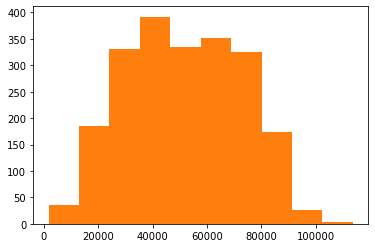

In [34]:
plt.hist(df_clean['Income']);

plt.hist(df_clean.loc[df_clean['Income'] < 120000, 'Income']);

In [37]:
df_clean.shape[0]

2157

### **2-2. sample의 평균값과 모집단의 평균값을 비교해봅니다.**

- `seed`는 2로 지정하세요.
- 위에서 전처리를 완료한 데이터프레임을 모집단으로 가정한 후, `Income` column의 평균을 구해 `mean_pop` 변수에 저장하세요.
- sample size가 5일 때, 해당 데이터셋의 `Income` 데이터를 10,000번 중복 추출한 표본 평균들을 `sample_5` 라는 이름의 array에 저장하세요.
  - `mean_pop`에서 `sample_5`의 평균을 뺀 값을 `diff_5`에 저장하세요.
- sample size가 200일 때, 해당 데이터셋의 `Income` 데이터를 10,000번 중복 추출한 표본 평균들을 `sample_200` 라는 이름의 array에 저장하세요.
  - `mean_pop`에서 `sample_200`의 평균을 뺀 값을 `diff_200`에 저장하세요.




##### **Q3. `diff_5`, `diff_200`의 결과를 각각 반올림하여 소수점 둘째 자리까지 (`diff_5`, `diff_200`)의 형태로 쓰세요.**

In [38]:
import random
np.random.seed(2)

In [39]:
mean_pop = df_clean['Income'].mean()

In [40]:
print ( mean_pop )

51540.83588317107


In [41]:
# 부트 스트렙 
def bootstrap( list_input , sample_count , repeat_count) :
  return_list = []
  for _ in range(repeat_count):
    sample = np.random.choice( list_input, sample_count, replace=True)
    return_list.append(sample.mean())
  #print ( return_list)
  return np.array(return_list)
  

In [42]:
sample_5 = bootstrap ( df_clean['Income'] , 5, 10000 )
diff_5 = mean_pop - sample_5.mean()

sample_200 = bootstrap ( df_clean['Income'] , 200, 10000 )
diff_200 = mean_pop - sample_200.mean()


In [43]:
print ( "(", round(diff_5 ,2) , "," , round(diff_200 ,2) , ")" )

( -58.6 , 12.72 )


### **2-3. sample의 분포를 통해 신뢰구간을 확인합니다.**
**2-2**에서 구현한 `sample_200` 표본 분포를 활용하여 모집단의 모수를 포함할 확률이 95%가 되는 구간을 찾아봅니다.



##### **Q4. 95% 신뢰구간의 lower limit과 upper limit을 각각 반올림하여 소수점 둘째 자리까지 (lower limit, upper limit)의 형태로 쓰세요.**

In [44]:
lower, upper = np.percentile(sample_200, 2.5), np.percentile(sample_200, 97.5) 

print ( "(", round(lower ,2) , "," , round(upper ,2) , ")" )

( 48668.47 , 54390.69 )


## **Part 3. Hypothesis Test**

데이터에서 다양한 시나리오를 파악하고 옳은 가설을 세우는 것은 매우 중요합니다. 위에 우리에게 주어진 데이터셋에 대해서도 다양한 시나리오에 대해 생각해볼 수 있습니다.

주어진 데이터셋에는 자녀가 청소년인지 여부를 나타내는 `Teenhome`과 연간 수입을 나타내는 `Income` 정보가 존재하는데, 청소년 자녀가 있는 경우 자녀의 연령에 따라 증가하는 지출, 고객의 회사 내 지위 등을 고려하여 수입이 증가할 것이라는 가설을 생각해 볼 수 있습니다. 

따라서 **고객의 자녀가 청소년인지 여부에 따라 연간 수입 평균값의 차이가 있는지** 가설검정을 통해 확인해보도록 하겠습니다.

### **3-1. One-tailed Test**

> 고객의 자녀가 청소년인 경우의 연간 수입 평균값이 그렇지 않은 경우보다 더 많은지 판단하고자 합니다.
- 자녀가 청소년인 경우 고객의 연간 수입 평균값: $μ_{yes}$
- 자녀가 청소년이 아닌 경우 고객의 연간 수입 평균값: $μ_{no}$







- 부트스트랩(Bootstrapping)을 활용하여 자녀가 청소년인 경우와 아닌 경우의 차이에 대한 표본분포를 simulate한 뒤, p-value를 확인하여 어떠한 가설을 채택할지 결정하세요.

  - `seed`는 2로 지정합니다.
  - simulate 횟수는 10000번으로 지정합니다.
  - sample의 데이터 수는 위의 데이터프레임과 동일한 사이즈(row 수)로 설정합니다.
  - (`자녀가 청소년인 샘플들의 평균값` - `자녀가 청소년이 아닌 샘플들의 평균값`)으로 차이를 구합니다.

##### **Q5. 이 경우에는 귀무가설과 대립가설을 어떻게 세워야 할까요?**

a. $H_0$: $μ_{no} ≥ μ_{yes}\;$, $\;H_a$: $μ_{no} < μ_{yes}$

b. $H_0$: $μ_{no} < μ_{yes}\;$, $\;H_a$: $μ_{no} ≥ μ_{yes}$

c. $H_0$: $μ_{no} > μ_{yes}\;$, $\;H_a$: $μ_{no} ≤ μ_{yes}$

d. $H_0$: $μ_{no} ≤ μ_{yes}\;$, $\;H_a$: $μ_{no} > μ_{yes}$

</br>


In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2157 non-null   int64 
 1   Year_Birth         2157 non-null   int64 
 2   Country            2157 non-null   object
 3   Education          2157 non-null   object
 4   Marital_Status     2157 non-null   object
 5   Income             2157 non-null   int64 
 6   Kidhome            2157 non-null   int64 
 7   Teenhome           2157 non-null   int64 
 8   Dt_Customer        2157 non-null   object
 9   Recency            2157 non-null   int64 
 10  MntWines           2157 non-null   int64 
 11  MntFruits          2157 non-null   int64 
 12  MntMeatProducts    2157 non-null   int64 
 13  MntFishProducts    2157 non-null   int64 
 14  MntSweetProducts   2157 non-null   int64 
 15  MntGoldProds       2157 non-null   int64 
 16  NumDealsPurchases  2157 non-null   int64 


In [46]:
df_clean['Teenhome'].isnull().sum()

0

In [47]:
len(df_clean)

2157

In [48]:
# 가설정의 
#
# 귀무 : 자녀no >= 자녀yes
# 대립 : 자녀no < 자녀yes

# 데이터 준비 
df_no = df_clean.query( 'Teenhome == 0') 
df_yes = df_clean.query( 'Teenhome == 1') 

sample_count = len(df_clean)
repeat_count = 10000

np.random.seed(2)

boot_no, boot_yes, boot_diff = [], [], []
for _ in range(repeat_count):
  sample = df_clean.sample(sample_count, replace=True)

  samp_no = sample[sample.Teenhome == 0]['Income'].mean()
  samp_yes = sample[sample.Teenhome == 1]['Income'].mean()
  
  boot_no.append( samp_no )
  boot_yes.append( samp_yes )
  boot_diff.append( samp_yes - samp_no )
  

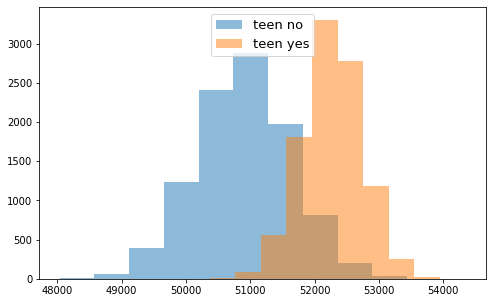

In [49]:
plt.figure(figsize=(8,5))
plt.hist(boot_no, alpha = 0.5, label='teen no')
plt.hist(boot_yes, alpha = 0.5, label = 'teen yes')
plt.legend(loc=9, fontsize=13)
plt.show()

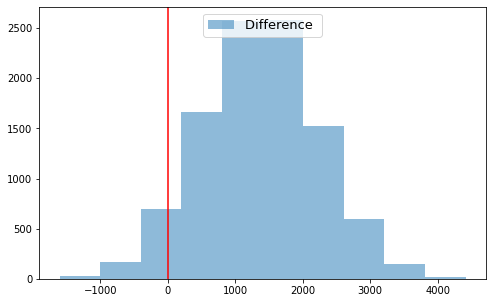

In [50]:
plt.figure(figsize=(8,5))
plt.hist(boot_diff, alpha=0.5, label = 'Difference ')
plt.axvline(0, c='r')
plt.legend(loc=9, fontsize=13);

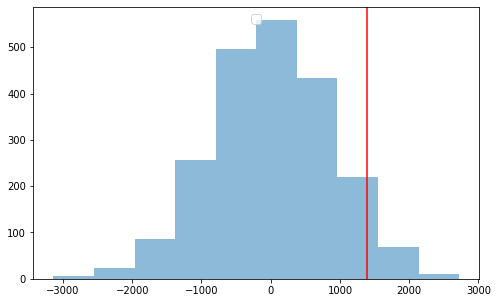

In [51]:
# P value 
sample_diff_mean = df_yes['Income'].mean() - df_no['Income'].mean()

sample_diff_std = np.std(boot_diff)

plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, sample_diff_std, sample_count) 
plt.hist(null_vals, alpha=0.5, )
plt.axvline(sample_diff_mean, color='r', )
plt.legend(loc=9, fontsize=13)
plt.show()


In [52]:
sample_diff_mean

1386.8917089926617

In [53]:
p = ( null_vals > sample_diff_mean ).mean()
p

0.055632823365785816

##### **Q6. 다음 중 위의 가설검정 결과로 나온 p-value를 통해 도출한 결론을 고르세요.** 

a. p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.

b. p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다.

c. p-value가 0.05보다 작으므로 귀무가설을 기각하지 못한다.

d. p-value가 0.05보다 크므로 귀무가설을 기각하고 대립가설을 채택한다.

e. p-value가 0.05보다 크므로 귀무가설과 대립가설 모두를 채택한다.

### **3-2. Two-tailed Test**

> 고객의 자녀가 청소년인 경우의 연간 수입 평균값이 그렇지 않은 경우와 차이가 있는지 판단하고자 합니다.
- 자녀가 청소년인 경우 고객의 연간 수입 평균값: $μ_{yes}$
- 자녀가 청소년이 아닌 경우 고객의 연간 수입 평균값: $μ_{no}$

- 이번 문제에서는 scipy 라이브러리의 [`.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)를 사용하여 가설검정을 진행하세요.






##### **Q7. 이 경우에는 귀무가설과 대립가설을 어떻게 세워야 할까요?** 

a. $H_0$: $μ_{no} =\; μ_{yes}\;$, $\;H_a$: $μ_{no} \neq \;μ_{yes}$

b. $H_0$: $μ_{no} < μ_{yes}\;$, $\;H_a$: $μ_{no} ≥ μ_{yes}$

c. $H_0$: $μ_{no} \neq\; μ_{yes}\;$, $\;H_a$: $μ_{no} = \;μ_{yes}$

d. $H_0$: $μ_{no} ≤ μ_{yes}\;$, $\;H_a$: $μ_{no} > μ_{yes}$

</br>







In [54]:
#정답 : a

##### **Q8. 위의 가설 검정 결과로 나온 p-value를 반올림하여 소수점 둘째 자리까지 쓰세요.**

In [55]:
from scipy import stats

# 독립집합인 a ,b 에 대한 T-test 수행 결과를 print 하고 P-value를 반환
# 에러시 np.nan 반환
'''
  prm_alternative : 
    'less' : 대안가설이 = 왼쪽의 평균이  오른쪽 보다 작다 인 경우
    'greater' 
    'two-sided' : 대안가설이 = 왼쪽 오른쪽의 평균이 다르다 인 경우  
'''
def t_test ( a, b , prm_alternative ) :
  ret_value = np.nan

  """
  # 정규성 검사 
  # : T-검정은 데이터의 정규본포를 가정으로 하는 검증법이다.
  # a0_pvalue 와 a1_pvalue 모두 > 0.05 보다 큰지 여부 확인 하여 
  # 둘 다 정규성을 만족하지 않는 경우 진행 중단.
  # shapiro test p>0.05이면 정규성이 보장된다. 
  sha_a0, a0_pvalue = stats.shapiro(a)
  sha_a1, a1_pvalue = stats.shapiro(b)
  if ( (a0_pvalue <= 0.05) | (a1_pvalue <= 0.05) ) :
    print (f"(todo) 에러 발생. {a0_pvalue} , {a1_pvalue} ")
    return ret_value
  """

  """
  # 분산의 동질성 검정
  # scipy.ttest_ind ( ) 를 사용하기 위해서는 분산 동질성 여부를 알고 있어야 한다.
  flg_분산동질여부 = False
  l, p = stats.levene(a,b)
  if p > 0.05 : # 0.05보다 큰 경우 분산은 동질성을 가지고 있다고 할 수 있음
    flg_분산동질여부 = True
  """
  flg_분산동질여부 = True

  # T 검정 수행
  # alternative='less' : 대안가설이 = 왼쪽의 평균이  오른쪽 보다 작다 인 경우
  # greater
  # alternative='two-sided' : 대안가설이 = 왼쪽 오른쪽의 평균이 다르다 인 경우  
  t, p = stats.ttest_ind(a, b , equal_var= flg_분산동질여부 , alternative=prm_alternative )


  # 결과출력
  # p < 0.05 인 귀무가설 기각
  rslt_맞는가설 = '귀무가설'
  if ( p < 0.05 ) :
      rslt_맞는가설 = '대립가설'
  print ( f"{rslt_맞는가설}이 맞음 p= {p}" )

  ret_value = p 
  
  return ret_value

In [56]:
# T-Test 수행

np.random.seed(2)

#(TODO) 분산동질성이 다른경우로 계산을 하면 값이 다르게 나와서 강제로 분산동질성 = True로 하여 함수를 실행 하였음
p = t_test ( df_no['Income'] , df_yes['Income'] , "two-sided" )
p


귀무가설이 맞음 p= 0.12240766983753497


0.12240766983753497

In [57]:
round ( p , 2)

0.12

## **Part 4. 도전 문제**

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 내용 또한 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항은 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

---

#### **$\chi^2$ 가설 검정을 시행합니다**

우리가 사용할 $\chi^2$ - test는 어떤 경우에 사용하는 가설 검정 방법인지 알아봅시다.


- one sample $\chi^2$ - test (적합도 검정)
  > **주어진 하나의 범주형 변수가 특정 예상되는 분포와 동일한 분포를 나타내는지** 에 대한 가설 검정 방법

  - 귀무가설($H_0$): 주어진 변수 X의 관측분포와 특정 예상 분포가 동일하다.
  - 대립가설($H_a$): 주어진 변수 X의 관측분포와 특정 예상 분포가 다르다.

- two sample $\chi^2$ - test (독립성 검정)
  > **두 개의 범주형 변수가 서로 연관되어 있는지 여부**에 대한 가설 검정 방법

  - 귀무가설($H_0$): 변수 X와 Y는 서로 독립이다. (연관 없음)
  - 대립가설($H_a$): 변수 X와 Y는 서로 독립이 아니다. (연관 있음)

</br>

위의 가설검정 방법에 대한 설명을 참고하여 진행해봅니다.


### **4-1. one sample $\chi^2$ - test**

> XYZ사는 다국적 기업으로 다양한 나라에 고객층을 확보하고 있으며, 5월을 맞아 **기혼자를 대상으로 한 이벤트를 기획**하려고 합니다. 이때, 우리는 모든 국가를 대상으로 이벤트를 진행하는 것이 효율적인지 $\chi^2$ - test를 통해 확인해보려 합니다. 만약 국적별 기혼자의 빈도가 비슷하다면, XYZ사는 모든 국가를 대상으로 이벤트를 진행하는 것을 고려할 것이고, 그렇지 않다면, 어떤 국적의 고객이 더 많은지 파악하는 추가 분석이 필요할 것입니다.


#### **기혼자의 빈도가 모든 나라에 대해 균일한지 가설 검정을 해보세요.**

---

[공식문서](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)를 참고하여 아래에 명시된 가설을 검정해봅시다. ($\alpha$ = 0.05)
- 귀무가설($H_0$): 고객의 국적(Country)별 기혼자(Married)의 빈도가 균일하게 분포되어 있다.
- 대립가설($H_a$): 고객의 국적(Country)별 기혼자(Married)의 빈도가 균일하게 분포되어 있지 않다.

> **Hint:** categorical feature 간의 "cross tab"을 생성하여 탐색해 보세요 (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)). 그리고 $\chi^2 test$를 적용해 보세요. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)을 사용하면 contingency table 을 생성할 수 있습니다.

In [35]:
df_clean['Marital_Status']

0       Divorced
1         Single
2        Married
3       Together
4         Single
          ...   
2152    Divorced
2153    Divorced
2154     Married
2155    Divorced
2156     Married
Name: Marital_Status, Length: 2157, dtype: object

In [14]:
df_clean['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [17]:
df_clean['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [18]:
pd.crosstab(df_clean['Country'].unique(), df_clean['Marital_Status'].unique() , margins=True)

col_0,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,All
row_0,,,,,,,,,
AUS,0,0,0,0,0,1,0,0,1
CA,0,0,0,0,1,0,0,0,1
GER,0,0,0,0,0,0,1,0,1
IND,0,0,0,0,0,0,0,1,1
ME,1,0,0,0,0,0,0,0,1
SA,0,1,0,0,0,0,0,0,1
SP,0,0,1,0,0,0,0,0,1
US,0,0,0,1,0,0,0,0,1
All,1,1,1,1,1,1,1,1,8


In [60]:
df_clean['isMarried'] = df_clean['Marital_Status'].apply( lambda x: 1 if x == 'Married' else 0 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
obs = pd.crosstab(df_clean['Country'], df_clean['isMarried'])
print ( obs )


isMarried    0    1
Country            
AUS         78   65
CA         158   97
GER         59   56
IND         89   55
ME           3    0
SA         224  104
SP         644  422
US          70   33


In [71]:
ct_mr = pd.crosstab(df_clean.Country,df_clean.isMarried)[1]
ct_mr

Country
AUS     65
CA      97
GER     56
IND     55
ME       0
SA     104
SP     422
US      33
Name: 1, dtype: int64

In [74]:
statistic , p_value = stats.chisquare(f_obs=ct_mr)
p_value

1.1461219475051596e-251

----



In [22]:
df_clean['Country']

0        SP
1        CA
2        US
3       AUS
4        SP
       ... 
2183     US
2184     US
2185     SP
2186     SP
2187    IND
Name: Country, Length: 2165, dtype: object

In [21]:
df_clean['Marital_Status']

0       Divorced
1         Single
2        Married
3       Together
4         Single
          ...   
2183    Divorced
2184    Divorced
2185     Married
2186    Divorced
2187     Married
Name: Marital_Status, Length: 2165, dtype: object

In [36]:
# 국적 - 결혼상태 crosstab 생성
country_marital = pd.crosstab(df_clean['Country'], df_clean['Marital_Status'])
country_marital



Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Country,,,,,,,,
AUS,1,0,18,65,17,37,5,0
CA,1,3,26,97,57,64,6,1
GER,0,0,6,56,18,31,4,0
IND,0,0,10,55,36,38,4,1
ME,0,0,0,0,2,1,0,0
SA,0,0,45,104,70,97,12,0
SP,0,0,104,422,233,265,42,0
US,0,0,16,33,29,23,2,0


In [37]:
# 기혼('Married') 상태에 해당하는 데이터만 추출
married = country_marital.loc[:,'Married']
married

Country
AUS     65
CA      97
GER     56
IND     55
ME       0
SA     104
SP     422
US      33
Name: Married, dtype: int64

In [38]:
# option 1) chisquare f_exp 파라미터 지정 X
stats, pvalue = chisquare(married)
pvalue



1.1461219475051596e-251

In [39]:
# option 2) 실제 분포와 기대 분포 직접 비교

# 기혼자 명수 총합
married_ppl = sum(married)
married_ppl
# 국적 수
len(df_clean['Country'].unique())
# 기혼('Married')에 해당하는 전체 데이터 수를 국적 수(8)으로 나눈 빈도 = 우리의 기대 분포 (국적별 빈도가 균일함)
exp = [married_ppl / 8]
exp_f = exp * 8
exp_f


# option 2) 실제 분포와 기대 분포 직접 비교
stats2, pvalue2 = chisquare(married, exp_f)
pvalue2

1.1461219475051596e-251

### **4-2. P-value 해석**



#### **가설검정 결과로 나온 p-value를 바탕으로 결론을 제시하세요.**

In [75]:
print ( p_value )
print ( "대립가설 채택 여부 " , p_value < 0.05)


1.1461219475051596e-251
대립가설 채택 여부  True


```## 이곳에 답을 작성하세요. ##```

대립가설 채택 : 국가별로 기혼자 수 비율은 차이가 있다.
